# Funzioni

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

def fit_predict_print(train, test, target_columns, estimator):
  X_tr = train.drop(columns=target_columns)
  y_tr = train[target_columns]
  X_ts = test.drop(columns=target_columns)
  y_ts = test[target_columns]

  return fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, estimator)


def fit_predict_print_1(X_train, X_test, y_train, y_test, estimator):
  y_pred = estimator.fit(X_train, y_train).predict(X_test)

  print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
  cm = metrics.confusion_matrix(y_test, y_pred)
  print('Confusion matrix:\n', cm)
  cmn = metrics.confusion_matrix(y_test, y_pred, normalize='true')
  ConfusionMatrixDisplay(cmn, display_labels=estimator.classes_).plot()
  return y_pred

In [ ]:
def xtab(rows_data, cols_data, normalize_rows=False):
  xtab = pd.crosstab(rows_data, cols_data)
  print('### Crosstab ###')
  print(xtab)
  if normalize_rows:
    for i in xtab.index:
      xtab.loc[i] = xtab.loc[i] / (rows_data == i).sum()
    print('### Normalized crosstab ###')
    print(xtab)
    _ = sns.heatmap(xtab, vmin=0, vmax=1)
  else:
    _ = sns.heatmap(xtab)
  return xtab

# Parte 1: Analisi

1

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA/data/training_set_fd.csv',
                      sep=';')

In [ ]:
dataset.head()

,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   claim_number        17998 non-null  int64  
 1   age_of_driver       17998 non-null  int64  
 2   gender              17998 non-null  object 
 3   marital_status      17993 non-null  float64
 4   annual_income       17998 non-null  int64  
 5   high_education_ind  17998 non-null  int64  
 6   address_change_ind  17998 non-null  int64  
 7   living_status       17998 non-null  object 
 8   claim_day_of_week   17998 non-null  object 
 9   accident_site       17998 non-null  object 
 10  past_num_of_claims  17998 non-null  int64  
 11  channel             17998 non-null  object 
 12  claim_est_payout    17981 non-null  float64
 13  age_of_vehicle      17990 non-null  float64
 14  vehicle_category    17998 non-null  object 
 15  vehicle_price       17998 non-null  float64
 16  vehi

2

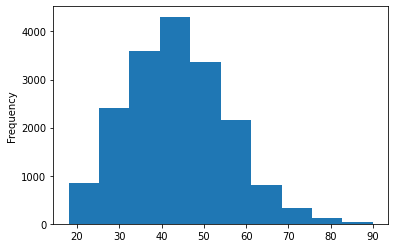

In [ ]:
under91 = dataset[dataset.age_of_driver < 91]
under91.age_of_driver.plot(kind='hist')

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#   print(under91.age_of_driver.value_counts().sort_index())

In [ ]:
bins = [18, 22, 26, 31, 41, 51, 91]
under91['dr_age_group'] = pd.cut(under91.age_of_driver, bins=bins, right=False,
                                 labels=range(1, 7, 1))
under91.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,claim_number,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,channel,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,dr_age_group
0,1,46,M,1.0,38301,1,1,Rent,Friday,Local,1,Broker,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0,5
1,3,21,F,0.0,30445,0,1,Rent,Thursday,Highway,1,Online,2966.024895,4.0,Large,29429.45218,white,28691.96422,0,1
2,4,49,F,0.0,38923,0,1,Own,Tuesday,Local,0,Broker,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1,5
3,5,58,F,1.0,40605,1,0,Own,Thursday,Local,3,Broker,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1,6
4,6,38,M,1.0,36380,1,0,Rent,Tuesday,Highway,0,Broker,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0,4


In [ ]:
under91.age_of_driver.describe()

count    17972.000000
mean        43.606054
std         11.668255
min         18.000000
25%         35.000000
50%         43.000000
75%         51.000000
max         90.000000
Name: age_of_driver, dtype: float64

In [ ]:
under91.dr_age_group.describe()

count     17972
unique        6
top           5
freq       5768
Name: dr_age_group, dtype: int64

Frodi nel gruppo 5: 19.43%
Frodi nel gruppo 1: 21.88%
Frodi nel gruppo 6: 9.53%
Frodi nel gruppo 4: 17.04%
Frodi nel gruppo 3: 15.66%
Frodi nel gruppo 2: 14.25%


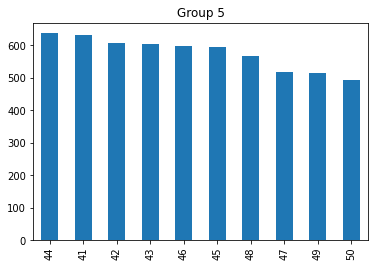

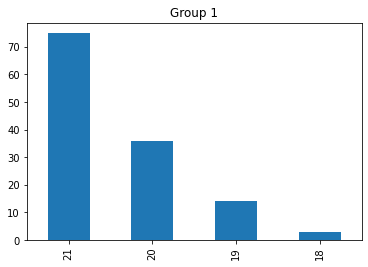

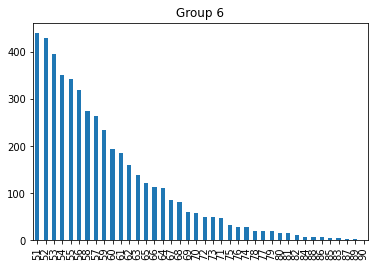

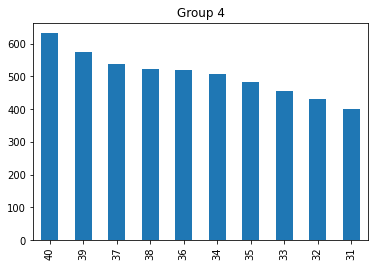

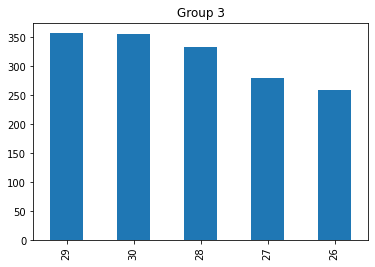

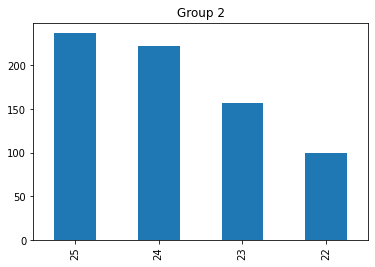

In [ ]:
for g in under91.dr_age_group.unique():
  ds = under91[under91.dr_age_group == g]
  print('Frodi nel gruppo {}: {:.2f}%'.format(g, ds.fraud.mean() * 100))
  plt.figure()
  ds.age_of_driver.value_counts().plot(kind='bar', title='Group {}'.format(g))

3

In [ ]:
dataset1 = dataset.copy()

In [ ]:
dataset1['over40'] = np.where(dataset.age_of_driver >= 40, 1, 0)

In [ ]:
pd.pivot_table(dataset1[['fraud', 'gender', 'over40']],
               index=['gender', 'over40'], aggfunc='mean')

fraud
gender over40          
F      0       0.179765
       1       0.170055
M      0       0.148630
       1       0.135830

4

### Crosstab ###
fraud                              0    1
claim_est_payout                         
(282.63800000000003, 2425.344]  1425  374
(2425.344, 3065.483]            1497  301
(3065.483, 3616.053]            1500  298
(3616.053, 4141.889]            1512  286
(4141.889, 4668.796]            1555  243
(4668.796, 5226.555]            1568  230
(5226.555, 5878.014]            1553  245
(5878.014, 6684.349]            1560  238
(6684.349, 7932.086]            1548  250
(7932.086, 17218.345]           1449  349
### Normalized crosstab ###
fraud                                  0         1
claim_est_payout                                  
(282.63800000000003, 2425.344]  0.792107  0.207893
(2425.344, 3065.483]            0.832592  0.167408
(3065.483, 3616.053]            0.834260  0.165740
(3616.053, 4141.889]            0.840934  0.159066
(4141.889, 4668.796]            0.864850  0.135150
(4668.796, 5226.555]            0.872080  0.127920
(5226.555, 5878.014]            0.863737  0

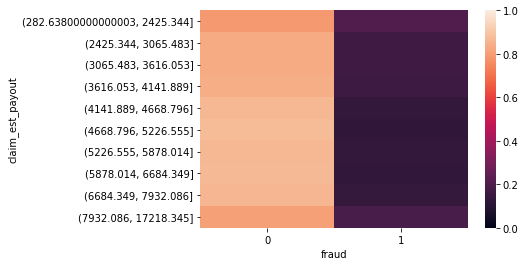

In [ ]:
_ = xtab(pd.qcut(dataset.claim_est_payout, 10), dataset.fraud,
         normalize_rows=True)

# Parte 2: Trasformazione e Predizione

1

In [ ]:
dataset.drop(columns='claim_number', inplace=True)

In [ ]:
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17968 entries, 0 to 17967
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_of_driver       17968 non-null  int64  
 1   gender              17968 non-null  object 
 2   marital_status      17968 non-null  float64
 3   annual_income       17968 non-null  int64  
 4   high_education_ind  17968 non-null  int64  
 5   address_change_ind  17968 non-null  int64  
 6   living_status       17968 non-null  object 
 7   claim_day_of_week   17968 non-null  object 
 8   accident_site       17968 non-null  object 
 9   past_num_of_claims  17968 non-null  int64  
 10  channel             17968 non-null  object 
 11  claim_est_payout    17968 non-null  float64
 12  age_of_vehicle      17968 non-null  float64
 13  vehicle_category    17968 non-null  object 
 14  vehicle_price       17968 non-null  float64
 15  vehicle_color       17968 non-null  object 
 16  vehi

In [ ]:
categorical = dataset.columns[dataset.dtypes == 'object']

In [ ]:
categorical

Index(['gender', 'living_status', 'claim_day_of_week', 'accident_site',
       'channel', 'vehicle_category', 'vehicle_color'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder().fit(dataset[categorical])
ds_enc = pd.DataFrame(enc.transform(dataset[categorical]), columns=categorical)

dataset2 = pd.concat([dataset.drop(columns=categorical), ds_enc], axis=1)
dataset2.head()

,age_of_driver,marital_status,annual_income,high_education_ind,address_change_ind,past_num_of_claims,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,46,1.0,38301,1,1,1,7530.940993,9.0,12885.45235,16161.33381,0,1.0,1.0,0.0,1.0,0.0,0.0,6.0
1,21,0.0,30445,0,1,1,2966.024895,4.0,29429.45218,28691.96422,0,0.0,1.0,4.0,0.0,1.0,1.0,6.0
2,49,0.0,38923,0,1,0,6283.888333,3.0,21701.18195,22090.94758,1,0.0,0.0,5.0,1.0,0.0,0.0,6.0
3,58,1.0,40605,1,0,3,6169.747994,4.0,13198.27344,38329.58106,1,0.0,0.0,4.0,1.0,0.0,2.0,3.0
4,38,1.0,36380,1,0,0,4541.387150,7.0,38060.21122,25876.56319,0,1.0,1.0,5.0,0.0,0.0,2.0,2.0


In [ ]:
train, test = train_test_split(dataset2, train_size=2/3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_tr = train.drop(columns='fraud')
y_tr = train.fraud
X_ts = test.drop(columns='fraud')
y_ts = test.fraud

Accuracy: 1.0
Confusion matrix:
 [[10105     0]
 [    0  1873]]


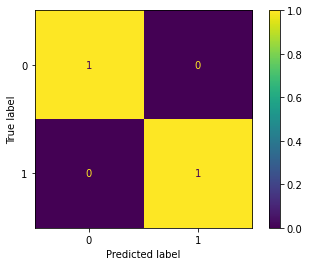

In [ ]:
_ = fit_predict_print_1(X_tr, X_tr, y_tr, y_tr, DecisionTreeClassifier())

Accuracy: 0.7430717863105175
Confusion matrix:
 [[4219  832]
 [ 707  232]]


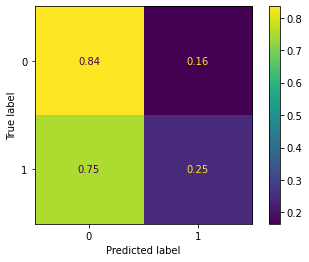

In [ ]:
_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, DecisionTreeClassifier())

In [ ]:
from sklearn.linear_model import LogisticRegression

Accuracy: 0.8431290699615963
Confusion matrix:
 [[10098     7]
 [ 1872     1]]


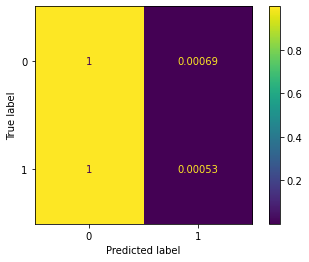

In [ ]:
_ = fit_predict_print_1(X_tr, X_tr, y_tr, y_tr, LogisticRegression(n_jobs=-1))

Accuracy: 0.8424040066777964
Confusion matrix:
 [[5046    5]
 [ 939    0]]


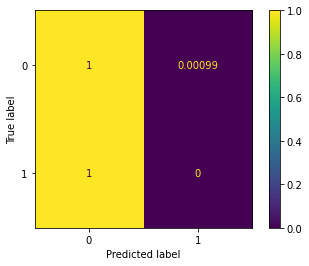

In [ ]:
_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, LogisticRegression(n_jobs=-1))

In [ ]:
from sklearn.dummy import DummyClassifier

Accuracy: 0.8436299883119052
Confusion matrix:
 [[10105     0]
 [ 1873     0]]


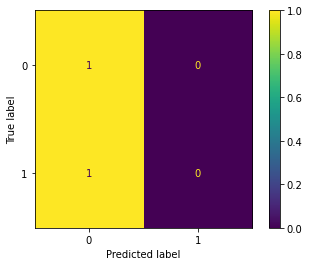

In [ ]:
_ = fit_predict_print_1(X_tr, X_tr, y_tr, y_tr, DummyClassifier())

Accuracy: 0.8432387312186979
Confusion matrix:
 [[5051    0]
 [ 939    0]]


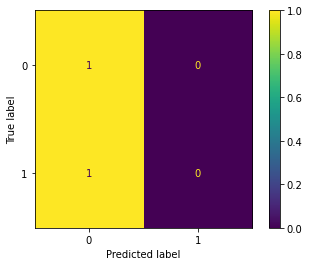

In [ ]:
y_pr = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, DummyClassifier())

In [ ]:
metrics.recall_score(y_ts, y_pr, average='macro')

0.5

In [ ]:
metrics.balanced_accuracy_score(y_ts, y_pr)

0.5

In [ ]:
"""
Siccome la classe da predirre è sbilanciata, invece di usare l'accuratezza è più
opportuno usare l'accuratezza bilanciata per classe, che coincide con la recall
con macroaveraging.
Il valore di accuratezza bilanciata è molto inferiore all'accuratezza e
rispecchia meglio quanto mostrato nella confusion matrix.
"""

"\nSiccome la classe da predirre è sbilanciata, invece di usare l'accuratezza è più\nopportuno usare l'accuratezza bilanciata per classe, che coincide con la recall\ncon macroaveraging.\nIl valore di accuratezza bilanciata è molto inferiore all'accuratezza e \nrispecchia meglio quanto mostrato nella confusion matrix.\n"

2

In [ ]:
X = dataset2.drop(columns='fraud')
y = dataset2.fraud

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy',
                cv=10, n_jobs=-1).mean()

0.7430979682792281

In [ ]:
cross_val_score(DecisionTreeClassifier(), X, y, scoring='balanced_accuracy',
                cv=10, n_jobs=-1).mean()

0.5412466708576603

3

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'penalty': ['l2', 'none'],
    'C': [1.0, 1.5, 2.0, 3.0, 4.0]
}

In [ ]:
gs = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy',
                  n_jobs=-1).fit(X, y)

In [ ]:
gs.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [ ]:
gs.best_score_

0.8434439159430296

4

In [ ]:
dataset3 = dataset2.copy()

In [ ]:
dataset3.claim_est_payout = pd.cut(dataset3.claim_est_payout, 10,
                                   labels=range(1, 11, 1))

dataset3.vehicle_price = pd.cut(dataset3.vehicle_price, 10,
                                labels=range(1, 11, 1))

In [ ]:
X = dataset3.drop(columns='fraud')
y = dataset3.fraud

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaled = MaxAbsScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns=X.columns)

In [ ]:
X_scaled.head()

,age_of_driver,marital_status,annual_income,high_education_ind,address_change_ind,past_num_of_claims,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,0.200873,1.0,0.704931,1.0,1.0,0.166667,0.5,0.5625,0.1,0.131375,1.0,1.0,0.000000,0.5,0.0,0.0,1.000000
1,0.091703,0.0,0.560341,0.0,1.0,0.166667,0.2,0.2500,0.3,0.233236,0.0,1.0,0.666667,0.0,0.5,0.5,1.000000
2,0.213974,0.0,0.716379,0.0,1.0,0.000000,0.4,0.1875,0.2,0.179577,0.0,0.0,0.833333,0.5,0.0,0.0,1.000000
3,0.253275,1.0,0.747336,1.0,0.0,0.500000,0.4,0.2500,0.1,0.311580,0.0,0.0,0.666667,0.5,0.0,1.0,0.500000
4,0.165939,1.0,0.669575,1.0,0.0,0.000000,0.3,0.4375,0.3,0.210350,1.0,1.0,0.833333,0.0,0.0,1.0,0.333333


In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X_scaled, y, train_size=2/3,
                                          random_state=1)

Accuracy: 0.7352253756260434
Confusion matrix:
 [[4175  876]
 [ 710  229]]


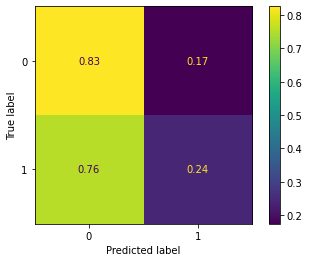

In [ ]:
_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, DecisionTreeClassifier())

Accuracy: 0.8417362270450751
Confusion matrix:
 [[5034   17]
 [ 931    8]]


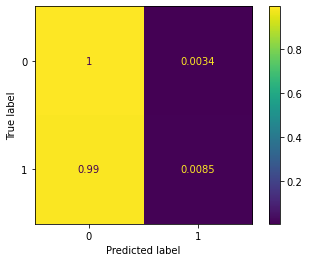

In [ ]:
_ = fit_predict_print_1(X_tr, X_ts, y_tr, y_ts, LogisticRegression(n_jobs=-1))

5

In [ ]:
dataset2.head()

,age_of_driver,marital_status,annual_income,high_education_ind,address_change_ind,past_num_of_claims,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,gender,living_status,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
0,46,1.0,38301,1,1,1,7530.940993,9.0,12885.45235,16161.33381,0,1.0,1.0,0.0,1.0,0.0,0.0,6.0
1,21,0.0,30445,0,1,1,2966.024895,4.0,29429.45218,28691.96422,0,0.0,1.0,4.0,0.0,1.0,1.0,6.0
2,49,0.0,38923,0,1,0,6283.888333,3.0,21701.18195,22090.94758,1,0.0,0.0,5.0,1.0,0.0,0.0,6.0
3,58,1.0,40605,1,0,3,6169.747994,4.0,13198.27344,38329.58106,1,0.0,0.0,4.0,1.0,0.0,2.0,3.0
4,38,1.0,36380,1,0,0,4541.387150,7.0,38060.21122,25876.56319,0,1.0,1.0,5.0,0.0,0.0,2.0,2.0


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

In [ ]:
to_discr = ['claim_est_payout', 'vehicle_price']
to_scale = dataset2.columns.drop(to_discr + ['fraud'])
to_scale

Index(['age_of_driver', 'marital_status', 'annual_income',
       'high_education_ind', 'address_change_ind', 'past_num_of_claims',
       'age_of_vehicle', 'vehicle_weight', 'gender', 'living_status',
       'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category',
       'vehicle_color'],
      dtype='object')

In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins=10, encode='ordinal'), to_discr),
        ('scale', MaxAbsScaler(), to_scale)], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('preprocessing', ct),
    ('model', LogisticRegression(n_jobs=-1))
])

In [ ]:
train, test = train_test_split(dataset2, train_size=2/3, random_state=1)

Accuracy: 0.8415692821368949
Confusion matrix:
 [[5033   18]
 [ 931    8]]


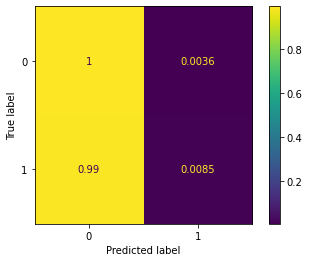

In [ ]:
_ = fit_predict_print(train, test, 'fraud', pipeline)

6

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
pipeline = Pipeline([
    ('preprocessing', ct),
    ('select_k_best', SelectKBest()),
    ('model', LogisticRegression(n_jobs=-1))
])

In [ ]:
param_grid = {
    'select_k_best__k': [5, 8, 10, 15],
    'preprocessing__discr__strategy': ['uniform', 'quantile'],
    'preprocessing__discr__n_bins': [6, 8, 10],
}

In [ ]:
gs = GridSearchCV(pipeline, param_grid, scoring='accuracy', verbose=3,
                  n_jobs=-1).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:233: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


In [ ]:
gs.best_params_

{'preprocessing__discr__n_bins': 6,
 'preprocessing__discr__strategy': 'quantile',
 'select_k_best__k': 8}

In [ ]:
gs.best_score_

0.8435552125484833

7

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
dataset0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDA/data/training_set_fd.csv',
                      sep=';')

dataset0 = dataset0.drop(columns='claim_number')

enc = OrdinalEncoder().fit(dataset[categorical])
ds_enc = pd.DataFrame(enc.transform(dataset0[categorical]), columns=categorical)

dataset0 = pd.concat([dataset0.drop(columns=categorical), ds_enc], axis=1)
dataset0.fillna(np.nan, inplace=True)

In [ ]:
dataset0.columns

Index(['age_of_driver', 'marital_status', 'annual_income',
       'high_education_ind', 'address_change_ind', 'past_num_of_claims',
       'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight',
       'fraud', 'gender', 'living_status', 'claim_day_of_week',
       'accident_site', 'channel', 'vehicle_category', 'vehicle_color'],
      dtype='object')

In [ ]:
columns = dataset0.columns.drop('fraud')
to_discr_idx = [ columns.get_loc(k) for k in to_discr ]
to_scale_idx = [ columns.get_loc(k) for k in to_scale ]

[6, 8]
[0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16]


In [ ]:
ct = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins=6, strategy='quantile'), to_discr_idx),
        ('scale', MaxAbsScaler(), to_scale_idx)], remainder='passthrough')

In [ ]:
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('preprocessing', ct),
    ('select_k_best', SelectKBest(k=8)),
    ('model', LogisticRegression(n_jobs=-1))
])

In [ ]:
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
}

In [ ]:
X = dataset0.drop(columns='fraud')
y = dataset0.fraud

In [ ]:
gs = GridSearchCV(pipeline, param_grid, scoring='accuracy', verbose=3,
                  n_jobs=-1).fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
gs.best_params_

{'imputer__strategy': 'mean'}

In [ ]:
gs.best_score_

0.8434826186286314